In [1]:
# standard libraries
import numpy as np 
import matplotlib.pyplot as plt

# for parallelization
from multiprocessing import Pool    # To parallelize the observations
from functools import partial       # To pool functions with multiple arguments

# my modules
from modules.surfaceintegration import *
from modules.polarizationtransport import *
from modules.starcatalog import *

In [2]:
# Initializing Arrays
phaseRange = np.arange(0, 2*np.pi, 0.05)


In [3]:
#Graph Parameters
plt.rcParams['figure.figsize'] = 10, 7
plt.rc('text', usetex=False)
plt.rcParams.update({'font.size': 15,
                     'legend.fontsize': 15})
plt.rcParams['font.family'] = 'serif'
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['lines.linewidth'] = 2.5

In [4]:
'''
Polarization dependance on Magnetic Field Strength at the Poles and Observation Spectra
'''
if __name__ == '__main__':
    
    # Pooling observations to run both parallely 
    with Pool(6) as p:
        
        # Magnetic Field Dependance
        Obs24, Obs14, Obs15, Obs16, Obs23 = p.map(partial(observation, phaseRange=phaseRange, E=1), [NS24, NS14, NS15, NS16, NS23])
        
        # Spectra Dependance
        Obs17, Obs18, Obs19 = p.map(partial(observation, NS14, phaseRange), [0.01, 0.1, 1])

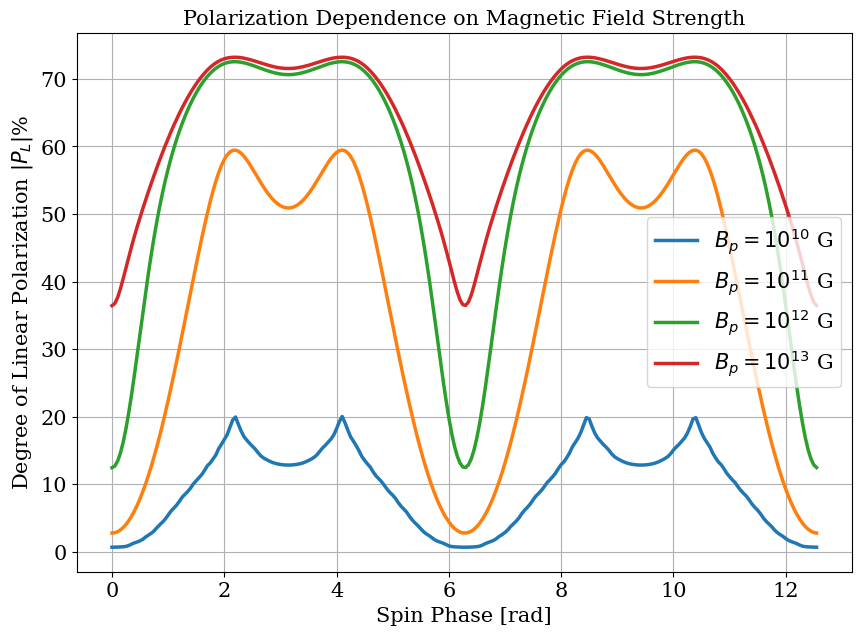

In [26]:
# plotting all the results from the simulations
plt.figsize = (18, 7)
plt.plot(phaseRange, Obs24.FQ/Obs24.I*100, label=r'$B_p = 10^{10}$ G')
plt.plot(phaseRange, Obs14.FQ/Obs14.I*100, label=r'$B_p = 10^{11}$ G')
plt.plot(phaseRange, Obs15.FQ/Obs15.I*100, label=r'$B_p = 10^{12}$ G')
plt.plot(phaseRange, Obs16.FQ/Obs16.I*100, label=r'$B_p = 10^{13}$ G')
plt.xlabel('Spin Phase [rad]')
plt.ylabel('Degree of Linear Polarization $|P_L|$%')
plt.title('Polarization Dependence on Magnetic Field Strength')
plt.grid()
plt.legend()
plt.savefig('fig/MagneticFieldDependance.png', dpi=300)

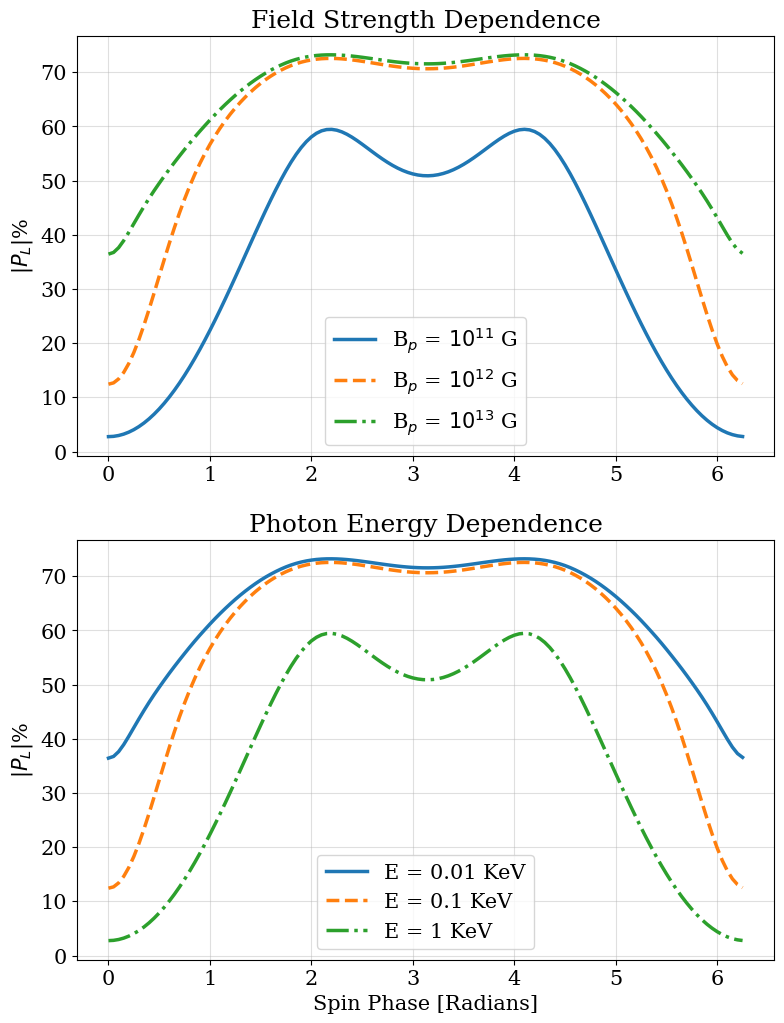

In [6]:
#############################################
########### PLOTTING THE RESULTS ############
#############################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

ax1.plot(phaseRange, Obs14.FQ/Obs14.I *100, label='B$_p$ = $10^{11}$ G')
ax1.plot(phaseRange, Obs15.FQ/Obs15.I*100, '--', label='B$_p$ = $10^{12}$ G')
ax1.plot(phaseRange, Obs16.FQ/Obs16.I*100, '-.', label='B$_p$ = $10^{13}$ G')
ax1.legend()
ax1.grid(alpha=0.4)
ax1.set_ylabel(r"$|P_L|$%")
ax1.set_title(r'Field Strength Dependence', size=18)

ax2.plot(phaseRange, Obs17.FQ/Obs17.I *100, label='E = 0.01 KeV')
ax2.plot(phaseRange, Obs18.FQ/Obs18.I*100, '--', label='E = 0.1 KeV')
ax2.plot(phaseRange, Obs14.FQ/Obs14.I*100, '-.', label='E = 1 KeV')
ax2.legend()
ax2.set_ylabel(r"$|P_L|$%")
ax2.grid(alpha=0.4)
ax2.set_xlabel("Spin Phase [Radians]")
ax2.set_title(r'Photon Energy Dependence', size=18)

plt.savefig('fig/ParameterDependance.png', dpi=300, bbox_inches='tight')

In [40]:
# Plotting in the form of a heatmap
if __name__ == '__main__':    
    # Pooling observations to run both parallely 
    with Pool(6) as p:
        # Photon Energy Field Dependance
        Obs21, Obs22, Obs23, Obs24, Obs25, Obs26, Obs27  = p.map(partial(observation, NS15, phaseRange), [1, 2, 3, 4, 5, 6, 7])
        Obs28, Obs29, Obs30, Obs31, Obs32, Obs33, Obs34  = p.map(partial(observation, NS15, phaseRange), [8, 9, 10, 11, 12, 13, 14])

#############################################
### SAVING THE COMPUTATION FOR EACH STAR ####
#############################################

# naming convention: [photonenergy]NS[star number].csv
np.savetxt('simData/1NS15.csv', [Obs21.FQ, Obs21.FU, Obs21.I], delimiter=',')
np.savetxt('simData/2NS15.csv', [Obs22.FQ, Obs22.FU, Obs22.I], delimiter=',')
np.savetxt('simData/3NS15.csv', [Obs23.FQ, Obs23.FU, Obs23.I], delimiter=',')
np.savetxt('simData/4NS15.csv', [Obs24.FQ, Obs24.FU, Obs24.I], delimiter=',')
np.savetxt('simData/5NS15.csv', [Obs25.FQ, Obs25.FU, Obs25.I], delimiter=',')
np.savetxt('simData/6NS15.csv', [Obs26.FQ, Obs26.FU, Obs26.I], delimiter=',')
np.savetxt('simData/7NS15.csv', [Obs27.FQ, Obs27.FU, Obs27.I], delimiter=',')
np.savetxt('simData/8NS15.csv', [Obs28.FQ, Obs28.FU, Obs28.I], delimiter=',')
np.savetxt('simData/9NS15.csv', [Obs29.FQ, Obs29.FU, Obs29.I], delimiter=',')
np.savetxt('simData/10NS15.csv', [Obs30.FQ, Obs30.FU, Obs30.I], delimiter=',')
np.savetxt('simData/11NS15.csv', [Obs31.FQ, Obs31.FU, Obs31.I], delimiter=',')
np.savetxt('simData/12NS15.csv', [Obs32.FQ, Obs32.FU, Obs32.I], delimiter=',')
np.savetxt('simData/13NS15.csv', [Obs33.FQ, Obs33.FU, Obs33.I], delimiter=',')
np.savetxt('simData/14NS15.csv', [Obs34.FQ, Obs34.FU, Obs34.I], delimiter=',')

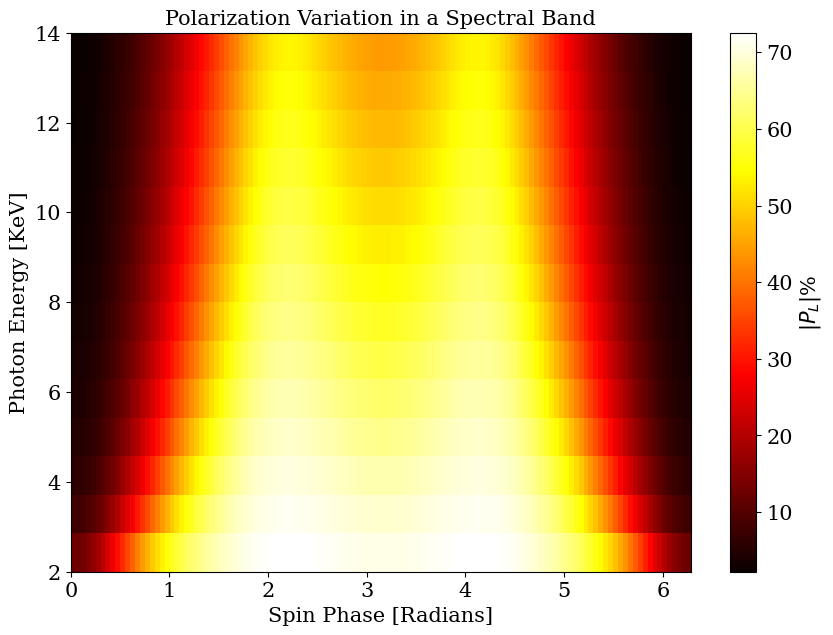

In [45]:
##############################################
###### PLOTTING THE HEATMAPS OF THE DATA #####
##############################################
obsData, pL = [Obs21, Obs22, Obs23, Obs24, Obs25, Obs26, Obs27, Obs28, Obs29, Obs30, Obs31, Obs32, Obs33, Obs34], []
pL = []
k = len(obsData)
while k > 0:
    pick = obsData[k-1]
    pL.append(np.abs(pick.FQ/pick.I) * 100)
    k = k - 1        
plt.imshow(pL, cmap='hot', interpolation='nearest', extent = [0, 2*np.pi, 2, 14], aspect='auto')
plt.xlabel('Spin Phase [Radians]')
plt.ylabel('Photon Energy [KeV]')
plt.title("Polarization Variation in a Spectral Band")
plt.colorbar(label=r"$|P_L|$%")
plt.savefig("fig/MultiwavelengthObservations.png", dpi=300, bbox_inches='tight')


In [3]:
'''
Polarization dependance on angle between LOS and magnetic axis 
and angle between LOS and spin axis
'''
#############################################
### RUNNING THE COMPUTATION FOR EACH STAR ###
#############################################
if __name__ == '__main__':
    
    # Pooling observations to run both parallely 
    with Pool(6) as p:
        
        Obs1, Obs2, Obs3, Obs4, Obs5, Obs6  = p.map(partial(observation, phaseRange=phaseRange, E=0.3), [NS1, NS2, NS3, NS4, NS5, NS6])
        Obs7, Obs8, Obs9, Obs10, Obs11, Obs12  = p.map(partial(observation, phaseRange=phaseRange, E=0.3), [NS7, NS8, NS9, NS10, NS11, NS12])

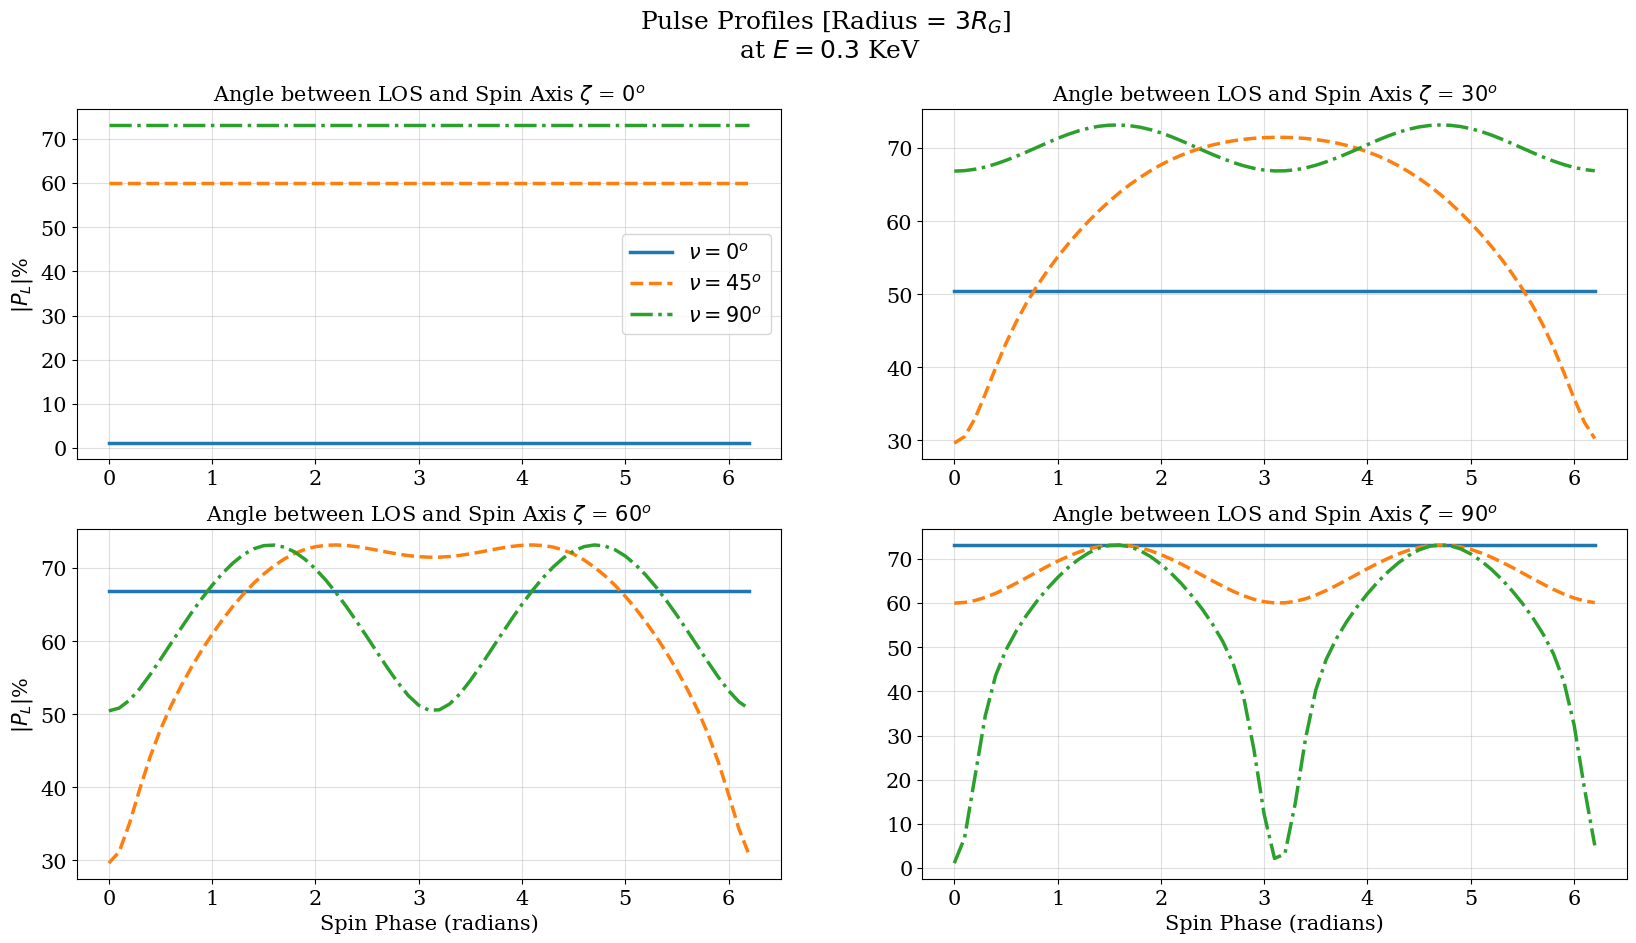

In [7]:
#############################################
########### PLOTTING THE RESULTS ############
#############################################

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 10))

ax1.plot(phaseRange, Obs1.FQ/Obs1.I*100, label=r'$\nu = 0^o$')
ax1.plot(phaseRange, Obs2.FQ/Obs2.I*100, '--', label=r'$\nu = 45^o$')
ax1.plot(phaseRange, Obs3.FQ/Obs3.I*100, '-.', label=r'$\nu = 90^o$')
ax1.set_ylabel(r"$|P_L|$%")
ax1.set_title(r'Angle between LOS and Spin Axis $\zeta$ = $0^o$')
ax1.legend()
ax1.grid(alpha=0.4)

ax2.plot(phaseRange, Obs4.FQ/Obs4.I*100, label=r'$\nu = 0^o$')
ax2.plot(phaseRange, Obs5.FQ/Obs5.I*100, '--', label=r'$\nu = 45^o$')
ax2.plot(phaseRange, Obs6.FQ/Obs6.I*100, '-.', label=r'$\nu = 90^o$')
ax2.set_title(r'Angle between LOS and Spin Axis $\zeta$ = $30^o$')
ax2.grid(alpha=0.4)

ax3.plot(phaseRange, Obs7.FQ/Obs7.I*100, label=r'$\nu = 0^o$')
ax3.plot(phaseRange, Obs8.FQ/Obs8.I*100, '--', label=r'$\nu = 45^o$')
ax3.plot(phaseRange, Obs9.FQ/Obs9.I*100, '-.', label=r'$\nu = 90^o$')
ax3.set_xlabel(r'Spin Phase (radians)')
ax3.set_title(r'Angle between LOS and Spin Axis $\zeta$ = $60^o$')
ax3.grid(alpha=0.4)
ax3.set_ylabel(r"$|P_L|$%")

ax4.plot(phaseRange, Obs10.FQ/Obs10.I*100, label=r'$\nu = 0^o$')
ax4.plot(phaseRange, Obs11.FQ/Obs11.I*100, '--', label=r'$\nu = 45^o$')
ax4.plot(phaseRange, Obs12.FQ/Obs12.I*100, '-.', label=r'$\nu = 90^o$')
ax4.set_xlabel(r'Spin Phase (radians)')
ax4.set_title(r'Angle between LOS and Spin Axis $\zeta$ = $90^o$')
ax4.grid(alpha=0.4)

fig.suptitle('Pulse Profiles [Radius = $3R_G$] \n at $E = 0.3$ KeV', fontsize=18)
plt.savefig('fig/PolarizationTransport_Io.png', dpi=300, bbox_inches='tight')
# plt.savefig('fig/PolarizationTransport_Ie.png', dpi=300, bbox_inches='tight')

In [4]:

phaseRangeFine = np.linspace(1, 5, 1000)
'''
Polarization dependance on Neutron Star Size
'''
if __name__ == '__main__':
    
    # Pooling observations to run both parallely 
    with Pool(6) as p:
        
        # Compactness Dependance
        Obs36, Obs37, Obs38, Obs39, Obs44  = p.map(partial(observation, phaseRange=phaseRangeFine, E=1), [NS17, NS18, NS19, NS20, NS21])
        # Obs40, Obs41, Obs42, Obs43  = p.map(partial(observation_nolensing, phaseRange=phaseRange, E=1), [NS17, NS18, NS19, NS20])

(1.6, 4.7)

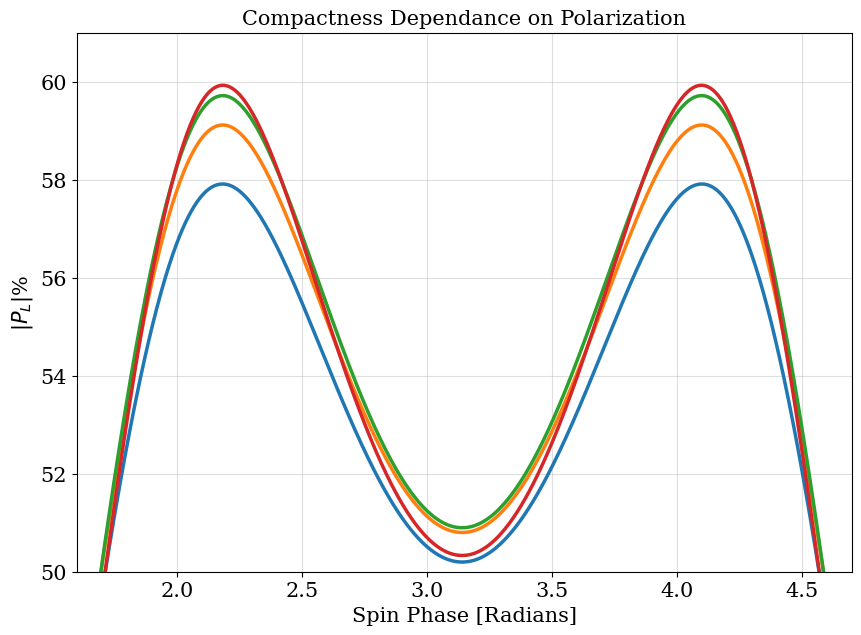

In [28]:
plt.plot(phaseRangeFine, Obs36.FQ/Obs36.I*100, label=r"R=2.2$r_G$")
plt.plot(phaseRangeFine, Obs37.FQ/Obs37.I*100, label=r"R=2.4$r_G$")
plt.plot(phaseRangeFine, Obs38.FQ/Obs38.I*100, label=r"R=2.6$r_G$")
plt.plot(phaseRangeFine, Obs44.FQ/Obs44.I*100, label=r"R=3.0$r_G$")


plt.xlabel("Spin Phase [Radians]")
plt.ylabel(r"$|P_L|$%")
plt.grid(alpha=0.4)
plt.title("Compactness Dependance on Polarization")
plt.legend()
plt.ylim(50, 61)
plt.xlim(1.6, 4.7)
plt.savefig("fig/CompactnessDependance_zoom.png", dpi=300, bbox_inches='tight')

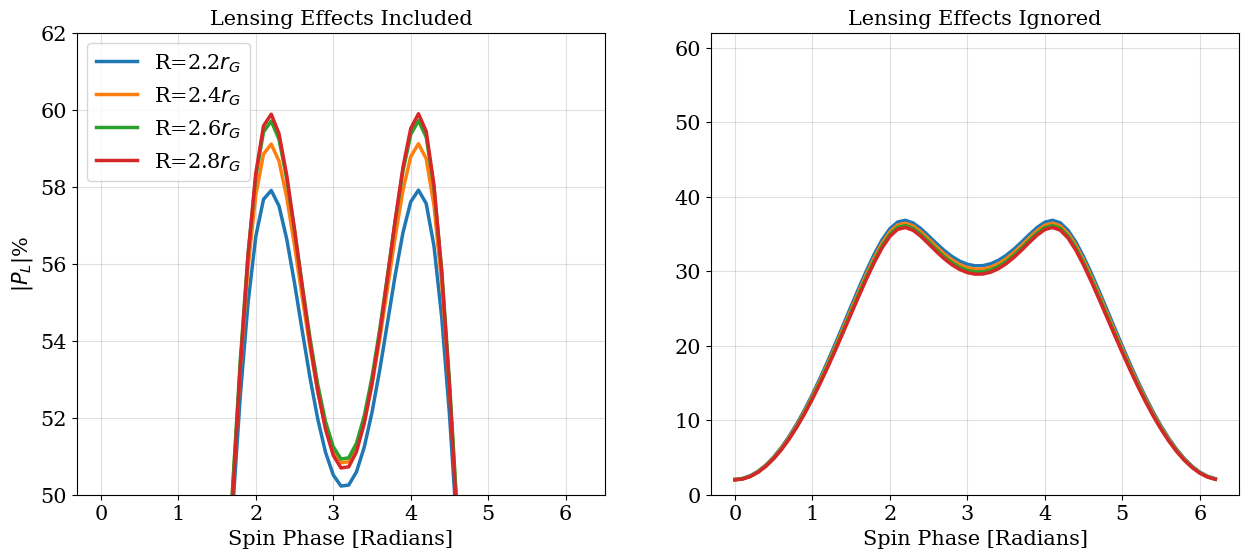

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(phaseRange, Obs36.FQ/Obs36.I*100, label=r"R=2.2$r_G$")
ax1.plot(phaseRange, Obs37.FQ/Obs37.I*100, label=r"R=2.4$r_G$")
ax1.plot(phaseRange, Obs38.FQ/Obs38.I*100, label=r"R=2.6$r_G$")
ax1.plot(phaseRange, Obs39.FQ/Obs39.I*100, label=r"R=2.8$r_G$")
ax1.plot(phaseRange, Obs44.FQ/Obs44.I*100, label=r"R=2.8$r_G$")

ax1.set_xlabel("Spin Phase [Radians]")
ax1.set_ylabel(r"$|P_L|$%")
ax1.grid(alpha=0.4)
ax1.set_title("Lensing Effects Included")
ax1.legend()
ax1.set_ylim(50, 62)


ax2.plot(phaseRange, Obs40.FQ/Obs40.I*100)
ax2.plot(phaseRange, Obs41.FQ/Obs41.I*100)
ax2.plot(phaseRange, Obs42.FQ/Obs42.I*100)
ax2.plot(phaseRange, Obs43.FQ/Obs43.I*100)
ax2.set_xlabel("Spin Phase [Radians]")
ax2.grid(alpha=0.4)
ax2.set_title("Lensing Effects Ignored")
ax2.set_ylim(0, 62)
# plt.title("Compactness Dependance")
plt.savefig("fig/compactnessDependance.png", dpi=300, bbox_inches='tight')